# Practical Assignment 4
Dennis Verheijden, s4455770 and Joost Besseling, s4796799

In [6]:
%matplotlib inline

from scipy.io import loadmat
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def show_image(X, i):
	""" a function that shows an image"""
	plt.imshow(np.reshape(X[i], newshape=[28, 28]).transpose())
	plt.show()

In [9]:
def split_data(x, y, test_size=0.2, shuffle=True):
	""" a function that splits the data"""
	x_6 = x[0:50]
	x_9 = x[50:100]
	y_6 = y[0:50]
	y_9 = y[50:100]

	x_6_train, x_6_test, y_6_train, y_6_test = train_test_split(x_6, y_6, test_size=test_size, shuffle=shuffle)
	x_9_train, x_9_test, y_9_train, y_9_test = train_test_split(x_9, y_9, test_size=test_size, shuffle=shuffle)

	x_train = np.vstack((x_6_train, x_9_train))
	x_test = np.vstack((x_6_test, x_9_test))
	y_test = np.vstack((y_6_test, y_9_test))
	y_train = np.vstack((y_6_train, y_9_train))

	return x_train, x_test, y_train, y_test


In [11]:
def handcrafted_norm(X):
	"""
		A function that normalizes X, and returns the mean and standard deviation, 
		So we can denormalize the data later on
	"""
	mean = np.mean(X, axis=0)
	std = np.std(X - mean, axis=0)
	return [np.nan_to_num((X - mean) / std), mean, std]

In [12]:
def exercise_1(plot=False):
	raw = loadmat("69dataset.mat")

	Y = raw['Y']
	X = raw['X']

	# normalize the data using sklearn
	[X, X_mean, X_std] = handcrafted_norm(X)
	Y = normalize(Y)

	X_train, X_test, Y_train, Y_test = split_data(X, Y, shuffle=False)

	# perform RidgeRegression with λ = 10^-6
	reg = Ridge(alpha=10**-6)
	reg.fit(Y_train, X_train)

	# predict the x's
	X_pred = reg.predict(Y_test)
	
	# normalize the data for better plotting
	X_pred = (X_pred * X_std) + X_mean
	X_test = (X_test * X_std) + X_mean

	if plot:
		for i in range(20):
			show_image(X_pred, i)
	
	return X_test, X_pred


/home/joost/anaconda3/envs/numpy/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


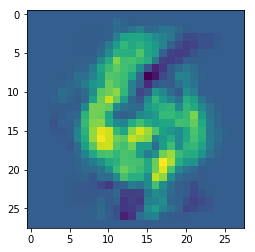

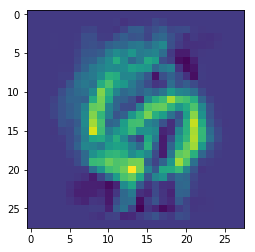

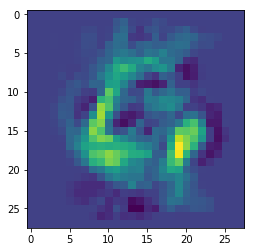

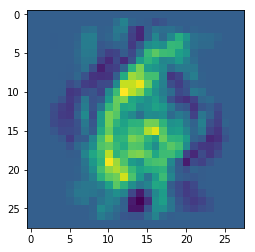

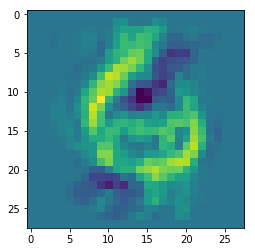

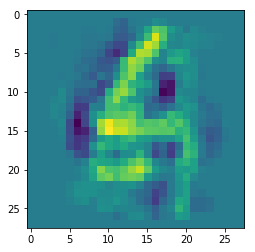

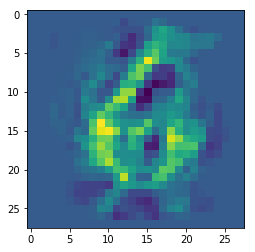

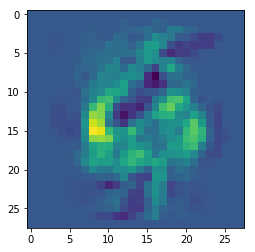

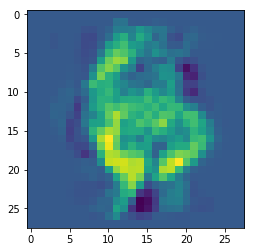

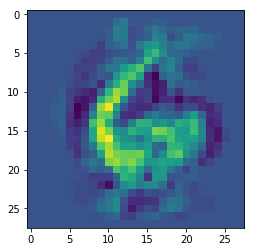

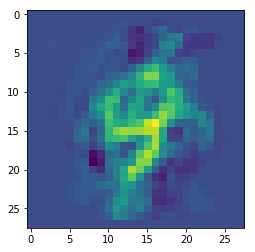

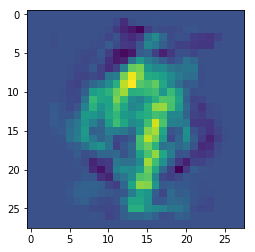

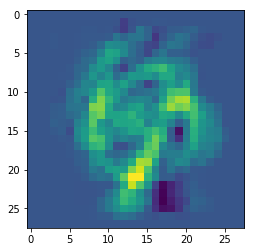

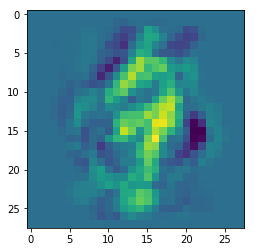

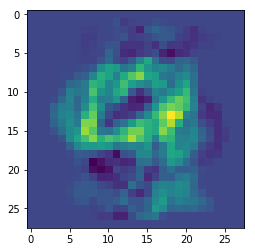

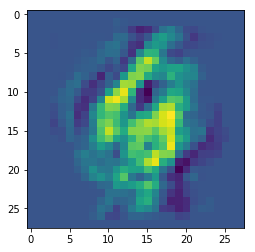

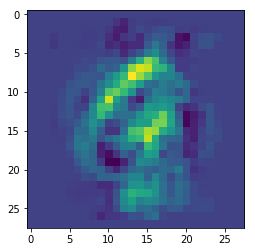

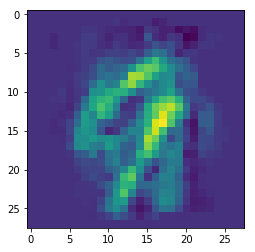

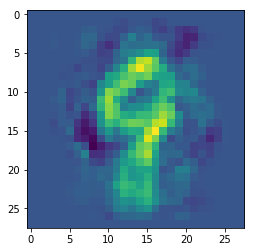

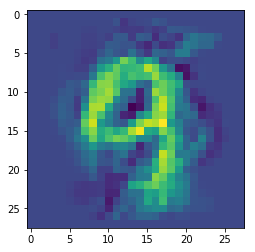

In [13]:
X, X_1 = exercise_1(True)

Desscribe what is happening

# Exercise 2

In [14]:
def exercise_2(plot=False):
	raw = loadmat("69dataset.mat")

	Y = raw['Y']
	X = raw['X']
	X_prior = raw['prior']

	[X, X_mean, X_std] = handcrafted_norm(X)
	Y = normalize(Y)
	X_prior = normalize(X_prior)

	X_train, X_test, Y_train, Y_test = split_data(X, Y, shuffle=False)

	reg = Ridge(alpha=10 ** -6)
	reg.fit(X_train, Y_train)

	sigma_prior = np.dot(X_prior.T, X_prior) / (len(X_prior) - 1)
	sigma_prior = sigma_prior + np.multiply(np.identity(len(sigma_prior)), 10**-6)  # regularization
	sigma = np.multiply(np.identity(reg.coef_.shape[0]), 10**-3)

	if plot:
		plt.imshow(sigma_prior.transpose())
		plt.title(r"The covariance matrix of the $\Sigma_{prior}$")
		plt.show()

	sigma_inv = np.linalg.inv(sigma)
	
	u_post = np.linalg.inv(sigma_prior)
	u_post = u_post + np.dot(np.dot(reg.coef_.T, sigma_inv), reg.coef_)
	u_post = np.linalg.inv(u_post)
	u_post = np.dot(u_post, reg.coef_.T)
	u_post = np.dot(u_post, sigma_inv)
	res = [np.dot(u_post, y) for y in Y_test]
	res = (res * X_std) + X_mean

	if plot:
		for i in range(len(res)):
			show_image(res, i)

	return res


/home/joost/anaconda3/envs/numpy/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


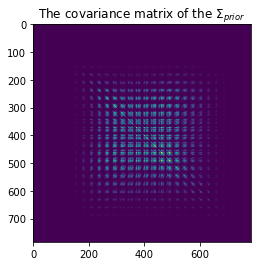

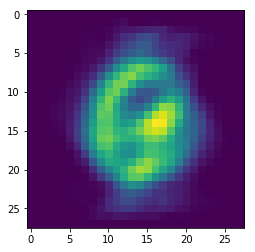

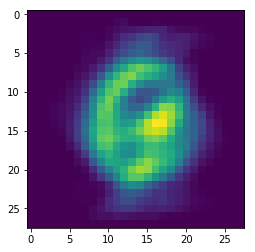

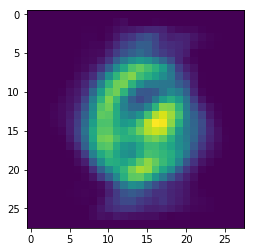

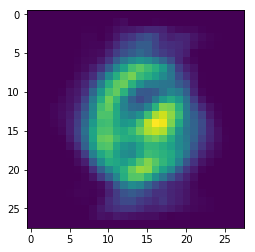

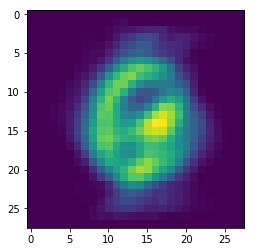

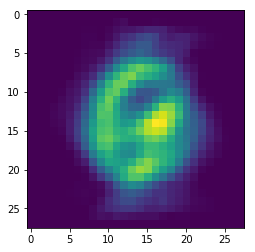

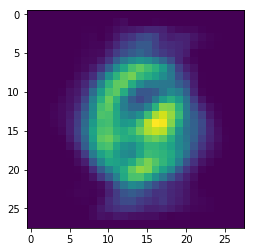

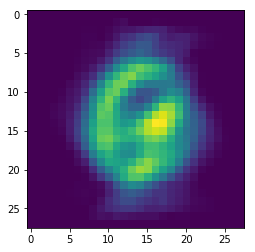

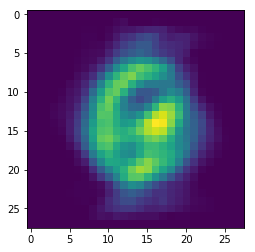

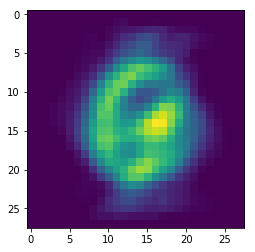

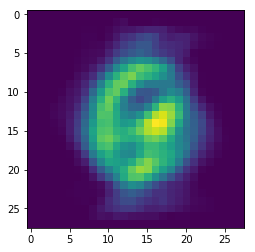

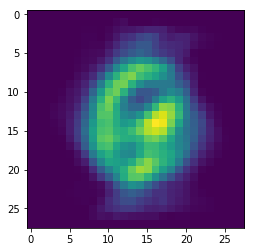

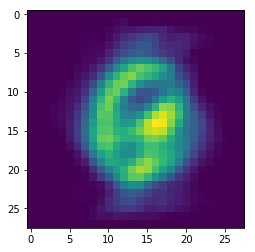

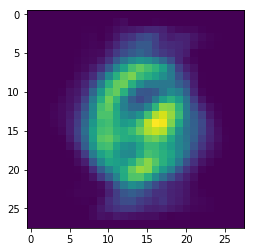

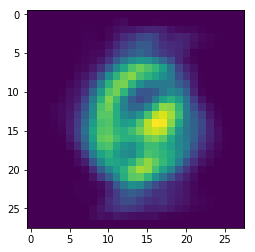

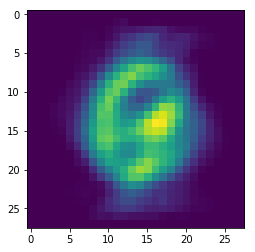

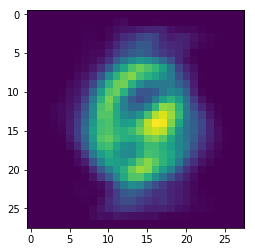

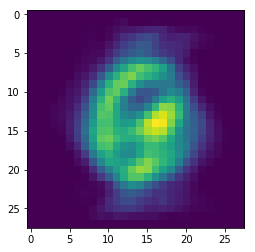

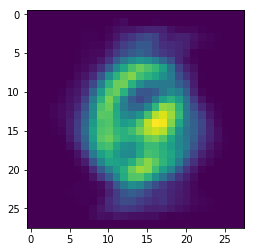

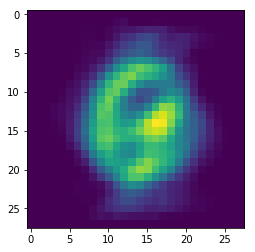

In [15]:
X2 = exercise_2(True)

# some text about the images

In [16]:
def compare(X, X1, X2):
	for i in range(X1.shape[0]):
		plt.subplot(131).set_title("Real Image")
		plt.imshow(np.reshape(X[i], newshape=[28, 28]).transpose())
		plt.subplot(132).set_title("Ridge Regression")
		plt.imshow(np.reshape(X1[i], newshape=[28, 28]).transpose())
		plt.subplot(133).set_title("Bayes")
		plt.imshow(np.reshape(X2[i], newshape=[28, 28]).transpose())
		plt.show()

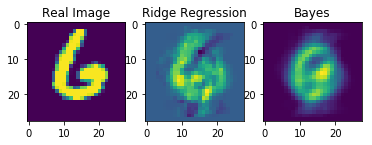

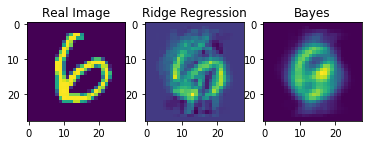

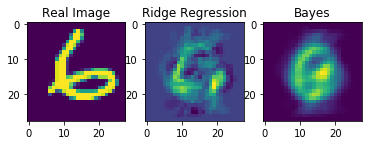

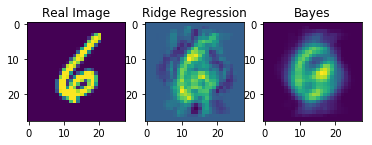

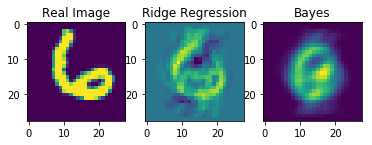

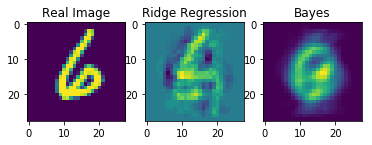

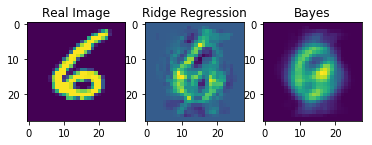

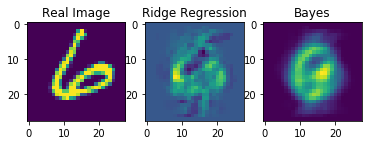

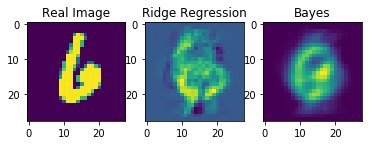

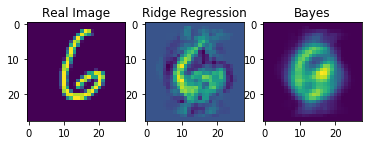

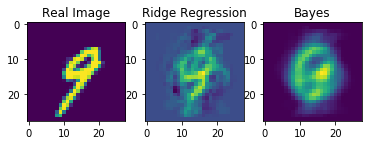

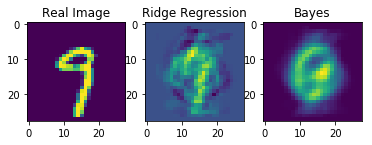

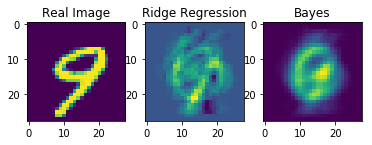

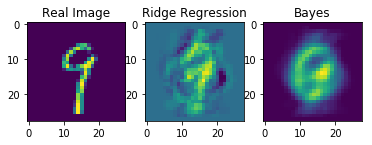

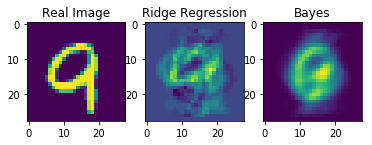

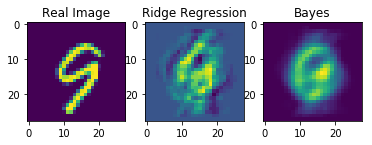

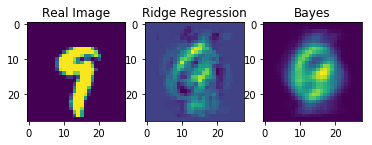

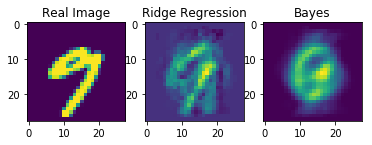

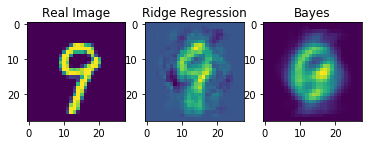

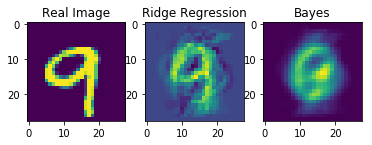

In [17]:
compare(X, X_1, X2)